<a href="https://colab.research.google.com/github/Mohammadkhilfeh/Adult-income/blob/main/Project_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
# set pandas to display more columns
pd.set_option('display.max_columns',50)

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week18/Data/adult.csv'
df = pd.read_csv(fpath)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df["income"].isna().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# **Cleaning Data**

In [6]:
# Chech Duplicate
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
# Obtain the value counts for all string columns
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for workclass
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value Counts for education
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64


Value Counts for marital-status
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: 

In [8]:
# Convert '?' to missing value

df["workclass"] = df["workclass"].replace('?', np.nan)
df["occupation"] = df["occupation"].replace('?', np.nan)
df["native-country"] = df["native-country"].replace('?', np.nan)

<ipython-input-8-e0b99ec15f59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["workclass"] = df["workclass"].replace('?', np.nan)
<ipython-input-8-e0b99ec15f59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["occupation"] = df["occupation"].replace('?', np.nan)
<ipython-input-8-e0b99ec15f59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [9]:
# Chech messing value
df.isna().sum().sum()

6456

In [10]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: ylabel='capital-gain'>

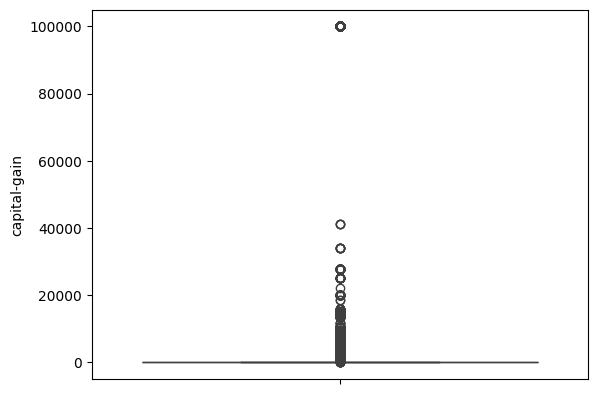

In [11]:
sns.boxplot(df['capital-gain'])

In [12]:
df["income"].isna().sum()

0

In [13]:
df["capital-gain"] = df["capital-gain"].replace(99999 , np.nan)

In [14]:
df.isna().sum().sum()

6700

In [15]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48546.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,583.035986,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,2537.938037,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,41310.000000,4356.000000,99.000000


# **EDA**

In [16]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

<ipython-input-16-e54f682687ab>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


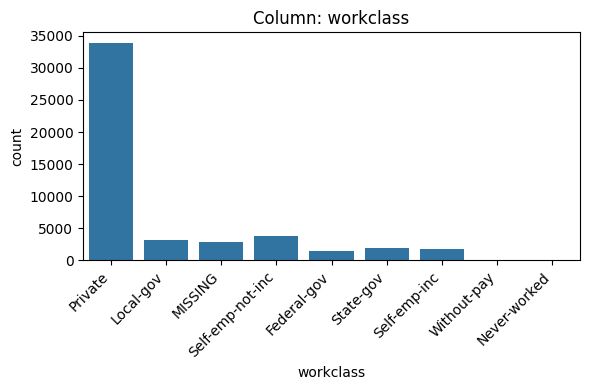

- NaN's Found: 2795 (5.73%)
- Unique Values: 9
- Most common value: 'Private' occurs 33860 times (69.4%)
- Not constant or quasi-constant.


In [17]:
explore_categorical(df, 'workclass');

In [18]:
def plot_categorical_vs_target(df, x, y='age',figsize=(6,4),
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()



  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

<ipython-input-18-1f9e5f38c2d0>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


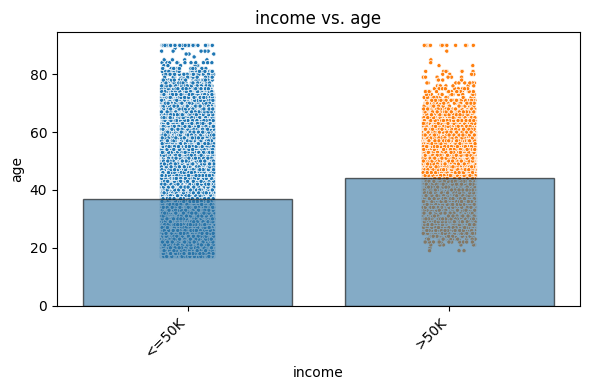

In [19]:
fig, ax = plot_categorical_vs_target(df, x='income')


# **Preparing data for modeling**

In [20]:
y = df['income']
X = df.drop(columns = 'income' , axis = 1)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [21]:
# Chech balance data
y_train.value_counts(normalize=True)

,proportion
income,
<=50K,0.760849
>50K,0.239151


In [22]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

num_cols = X_train.select_dtypes('number').columns
scaler = StandardScaler()
imputer = SimpleImputer(strategy='median')
num_pipeline = make_pipeline(imputer, scaler)
num_tuple = ("Numaric" ,num_pipeline, num_cols)

# PREPROCESSING PIPELINE FOR NOMINAL DATA
cat_cols = X_train.select_dtypes('object').columns
impute_na = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_pipeline = make_pipeline(impute_na, ohe)
cat_tuple = ("Categorical", cat_pipeline, cat_cols)

# MAKE PREPROSSER
preprocessor = ColumnTransformer(transformers=[num_tuple, cat_tuple],verbose_feature_names_out=False)

In [23]:
from os import pipe
# RandomForest defult model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
pipe_rf = make_pipeline(preprocessor, rf)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numaric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27841
        >50K       1.00      1.00      1.00      8751

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



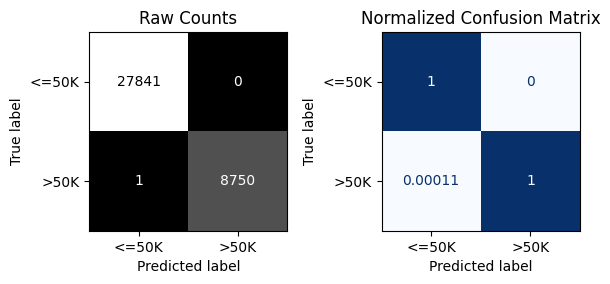


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      9268
        >50K       0.74      0.61      0.67      2930

    accuracy                           0.86     12198
   macro avg       0.81      0.77      0.79     12198
weighted avg       0.85      0.86      0.85     12198



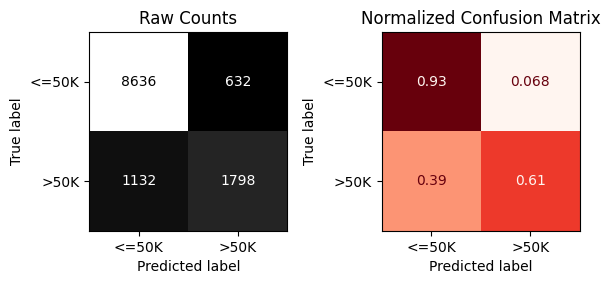

In [25]:
# Obtain evaluation metrics using custom function
evaluate_classification(pipe_rf, X_train, y_train, X_test, y_test)

## **Evaluate**


1.   61% of the predicted data is True and they paid more than 50K (TP)
2.   93% of the predicted data is True and the paid less than or equal 50K (TN)

This model is highly overfited and learning too much in training data



In [26]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(pipe_rf, X_test, y_test,n_repeats =5, random_state = SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [27]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

,permutation importance
capital-gain,3.820298e-02
marital-status,1.751107e-02
occupation,1.526480e-02
age,1.442859e-02
relationship,1.273979e-02
capital-loss,9.394983e-03
educational-num,8.460403e-03
hours-per-week,7.181505e-03
workclass,4.279390e-03
fnlwgt,3.164453e-03


In [28]:
# Obtain feature importances from the fit model
rf.feature_importances_

array([1.54038437e-01, 1.72827972e-01, 6.37513352e-02, 8.62764236e-02,
       3.08982533e-02, 8.44944030e-02, 4.72504244e-03, 5.56234516e-03,
       7.21781740e-06, 1.04432377e-02, 5.93289393e-03, 8.08387319e-03,
       4.41218863e-03, 7.27621802e-05, 1.58674225e-03, 1.76207182e-03,
       6.67931143e-04, 2.73512855e-04, 6.63634837e-04, 2.09282092e-03,
       1.11465013e-03, 2.27635850e-03, 2.39025353e-03, 1.49087418e-02,
       3.83722274e-03, 7.55185345e-03, 8.16651062e-03, 4.72848713e-05,
       6.88163841e-03, 5.10128124e-03, 5.33064860e-03, 3.57005361e-04,
       5.92809428e-02, 9.03887889e-04, 2.45663357e-02, 1.63650090e-03,
       1.62759191e-03, 5.38897546e-03, 7.49168527e-05, 6.56462407e-03,
       1.73963436e-02, 4.30184507e-03, 3.09634501e-03, 3.45283780e-03,
       6.43767803e-03, 1.46465553e-04, 1.06389182e-02, 2.81879311e-03,
       6.96327261e-03, 4.37761887e-03, 4.46254804e-03, 5.11187894e-02,
       1.07976201e-02, 1.52714791e-03, 8.44174282e-03, 4.32943988e-03,
      

In [29]:
# Saving the feature importances
importances = pd.Series(rf.feature_importances_,index=preprocessor.get_feature_names_out(),
                       name='Feature Importance')
importances

,Feature Importance
age,0.154038
fnlwgt,0.172828
educational-num,0.063751
capital-gain,0.086276
capital-loss,0.030898
...,...
native-country_Thailand,0.000061
native-country_Trinadad&Tobago,0.000082
native-country_United-States,0.005402
native-country_Vietnam,0.000308


In [30]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

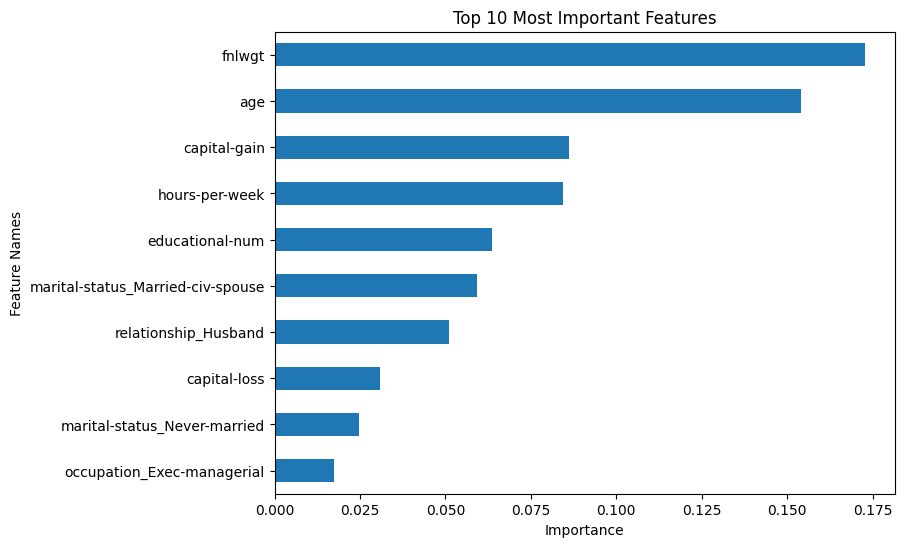

In [35]:
plot_importance_color(importances, color_dict=None,top_n=10);

Text(0.5, 1.0, 'fnlwgt vs income')

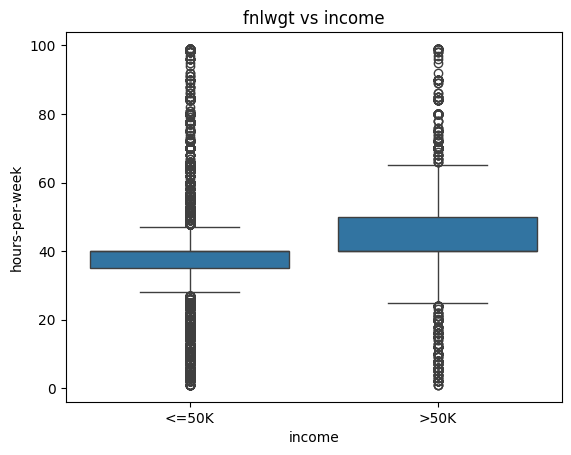

In [37]:
import seaborn as sns

ax = sns.boxplot(df, x = 'income' , y = 'hours-per-week')
ax.set_title('fnlwgt vs income')

## **Evaluate**

It is clear from the graph above the higher income work around 50 hours per week, 50% people with lower income work 35 hours per week.
There are many outliers values of total working hours per week.

Text(0.5, 1.0, 'age vs income')

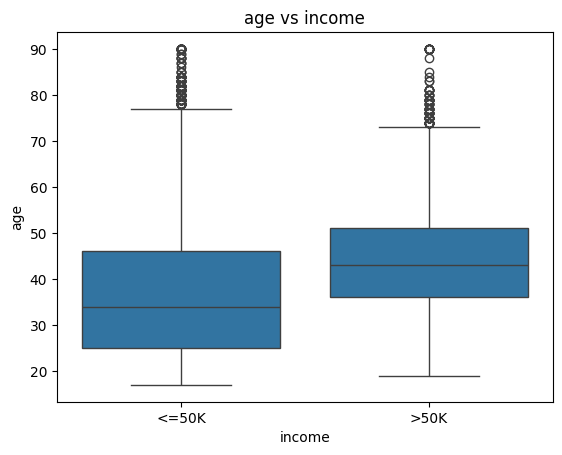

In [38]:
ax = sns.boxplot(df, x = 'income' , y = 'age')
ax.set_title('age vs income')

## **Evaluate**

It is clear from the chart above that 50% of the lower income individuals have an age of 35 years old, which means that those people are in the first years of experience. On the other hand people with higher salaries (more than 50K) have at least 10 years of experience more than the lower income population.